Preprocessing:
Matching different names

1st process
Removing a small number of tests

Creating combinations of different tests up to 10 degrees

2nd process:
Removing blank dates

Find those who have multiple tests at different times

### IMPORTING THE NECESSERY LIBRRRARIES AND LOADING THE DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('combined_lab_testsV5.csv')
df.head()

C:\Users\akar\AppData\Local\Temp\ipykernel_25908\2148817335.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined_lab_testsV5.csv')


,Sample ID,Patient Name,Gender,Date of Birth,Test Name,Unit,Category,Result,Date of Sample\r\n,Lab,Discritization,Test,Age,Age Disag,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,26699,Fatma Ali Muhamad,Female,04/09/1923,S.Iron,Âµg/dl,Iron Profile,26.4,04/09/2024,Biolab Halabja,Low,S.Iron-Low,100,Senior,NaN,NaN,NaN
1,26699,Fatma Ali Muhamad,Female,04/09/1923,CRP Titer,mg/l,Biochemical Test,67.61,04/09/2024,Biolab Halabja,Severe Elevation,CRP Titer-Severe Elevation,100,Senior,NaN,NaN,NaN
2,7945,Kafya Zorab Mahmod,Female,02/09/1925,Troponin T hs Stat,pg/ml,Cardiac Markers,37.56,02/09/2023,Biolab Halabja,High,Troponin T hs Stat-High,98,Senior,NaN,NaN,NaN
3,37445,Manij sharif karim,Female,11/03/1925,Troponin T hs Stat,pg/ml,Cardiac Markers,32.8,11/03/2025,Biolab Halabja,High,Troponin T hs Stat-High,98,Senior,NaN,NaN,NaN
4,24500,qadry abdulqadr hamaamin,Female,04/12/1927,Blood Sugar,mg/dl,Diabetes Test,108,04/12/2024,Hawkari Halabja,Prediabetes,Blood Sugar-Prediabetes,96,Senior,NaN,NaN,Patient Name


In [2]:
df.drop(columns=['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], inplace=True)
df.head()

,Sample ID,Patient Name,Gender,Date of Birth,Test Name,Unit,Category,Result,Date of Sample\r\n,Lab,Discritization,Test,Age,Age Disag
0,26699,Fatma Ali Muhamad,Female,04/09/1923,S.Iron,Âµg/dl,Iron Profile,26.4,04/09/2024,Biolab Halabja,Low,S.Iron-Low,100,Senior
1,26699,Fatma Ali Muhamad,Female,04/09/1923,CRP Titer,mg/l,Biochemical Test,67.61,04/09/2024,Biolab Halabja,Severe Elevation,CRP Titer-Severe Elevation,100,Senior
2,7945,Kafya Zorab Mahmod,Female,02/09/1925,Troponin T hs Stat,pg/ml,Cardiac Markers,37.56,02/09/2023,Biolab Halabja,High,Troponin T hs Stat-High,98,Senior
3,37445,Manij sharif karim,Female,11/03/1925,Troponin T hs Stat,pg/ml,Cardiac Markers,32.8,11/03/2025,Biolab Halabja,High,Troponin T hs Stat-High,98,Senior
4,24500,qadry abdulqadr hamaamin,Female,04/12/1927,Blood Sugar,mg/dl,Diabetes Test,108,04/12/2024,Hawkari Halabja,Prediabetes,Blood Sugar-Prediabetes,96,Senior


In [ ]:
# Rename columns for consistency
df = df.rename(columns={
    'Date of Birth': 'DOB',
    'Date of Sample\r\n': 'DOS'
})
df.head()

#### CHECKING IF THE DOB AND DOS ARE RELIABLE

In [34]:
# CHECKING IF THE DOB IS RELIABLE
print(f"Count of the first number (aka. the day) in the all dates of `Date of Birth` to be bigger than 12: {sum(1 for dob in df['DOB'] if int(dob.split('/')[0]) > 12)}")
print(f"Count of the second number (aka. the month) in the all dates of `Date of Birth` to be bigger than 12: {sum(1 for dob in df['DOB'] if int(dob.split('/')[1]) > 12)}")
print(f"Count of the first number (aka. the day) in the all dates of `Date of Sample` to be bigger than 12: {sum(1 for dob in df['DOS'] if type(dob) == str and int(dob.split('/')[0]) > 12)}")
print(f"Count of the second number (aka. the month) in the all dates of `Date of Sample` to be bigger than 12: {sum(1 for dob in df['DOS'] if type(dob) == str and int(dob.split('/')[1]) > 12)}")



Count of the first number (aka. the day) in the all dates of `Date of Birth` to be bigger than 12: 0
Count of the second number (aka. the month) in the all dates of `Date of Birth` to be bigger than 12: 0
Count of the first number (aka. the day) in the all dates of `Date of Sample` to be bigger than 12: 53531
Count of the second number (aka. the month) in the all dates of `Date of Sample` to be bigger than 12: 0


##### DOB IN THE DATA SET IS NOT ACCURATE
We get into the conclusion that the DOB is not accurate since we don't have any date with having a day bigger than 12.
##### DOS has no similer issue
On The other hand we don't have the same issue with DOS and the first number is corresponding to day of the date.

Distribution of first and second number in Date Of Birth (DOB)


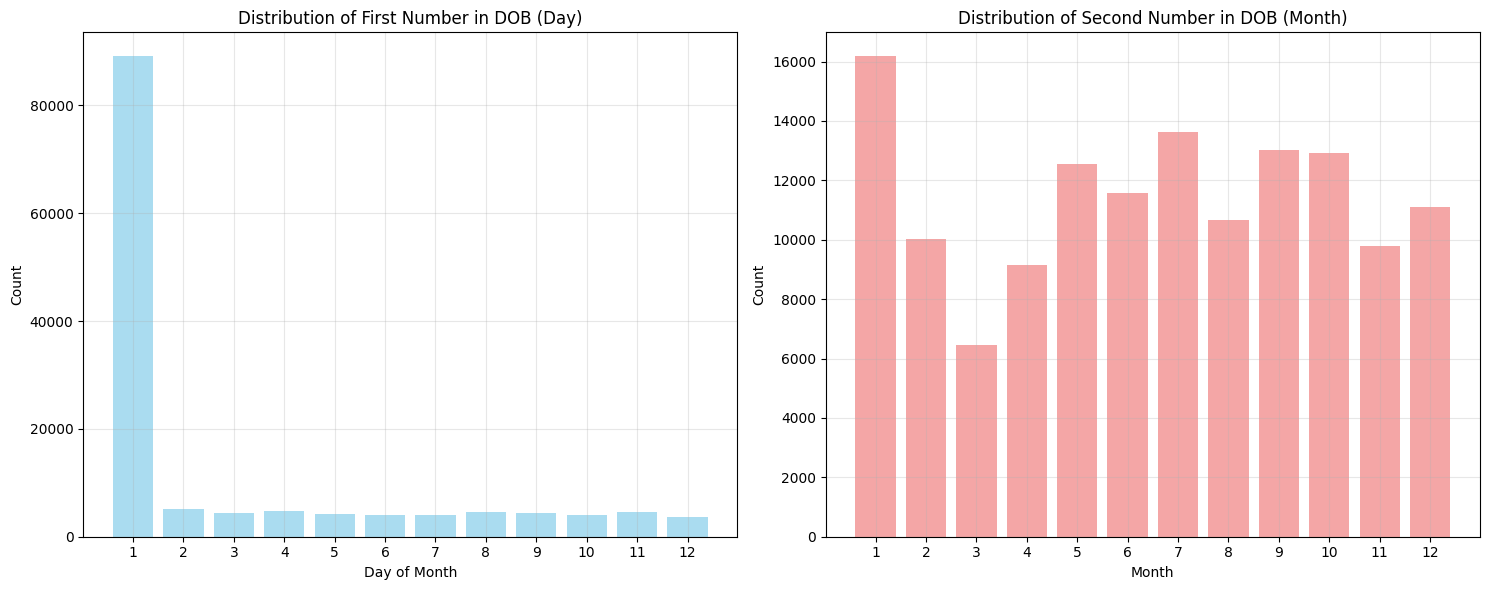

First position (day) counts: [89095, 5189, 4442, 4804, 4199, 4046, 3981, 4635, 4426, 3982, 4512, 3708]
Second position (month) counts: [16174, 10018, 6454, 9137, 12543, 11559, 13631, 10668, 13018, 12925, 9791, 11101]


In [140]:
first_count = [0] * 12
second_count = [0] * 12

# Use list comprehension or built-in sum function directly
for i in range(12):
    first_count[i] = len([1 for dob in df['DOB'] if int(dob.split('/')[0]) == (i+1)])
    second_count[i] = len([1 for dob in df['DOB'] if int(dob.split('/')[1]) == (i+1)])

print("Distribution of first and second number in Date Of Birth (DOB)")
# Visualize the distribution of dates by position (day/month)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot first position (day) distribution
months = list(range(1, 13))
ax1.bar(months, first_count, color='skyblue', alpha=0.7)
ax1.set_xlabel('Day of Month')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of First Number in DOB (Day)')
ax1.set_xticks(months)
ax1.grid(True, alpha=0.3)

# Plot second position (month) distribution
ax2.bar(months, second_count, color='lightcoral', alpha=0.7)
ax2.set_xlabel('Month')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Second Number in DOB (Month)')
ax2.set_xticks(months)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print the counts for verification
print("First position (day) counts:", first_count)
print("Second position (month) counts:", second_count)


Distribution of first and second number in Date Of Sample (DOS)


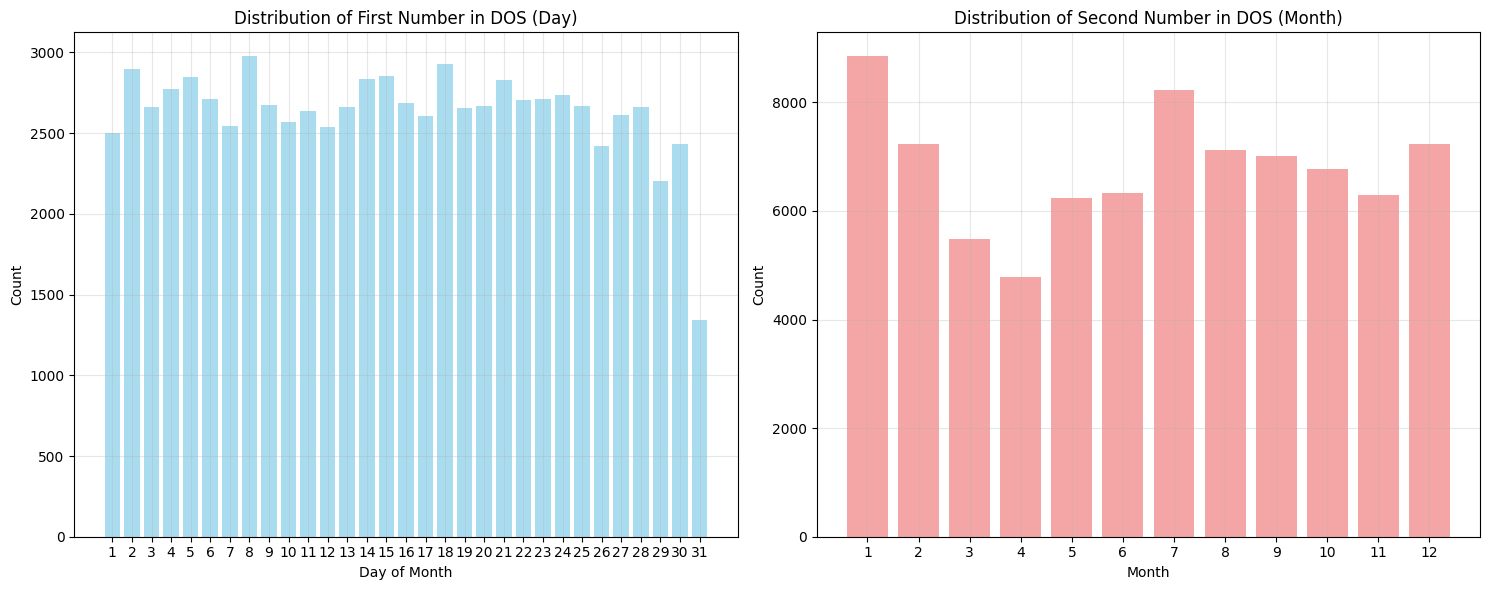

First position (day) counts: [2501, 2900, 2665, 2771, 2845, 2709, 2543, 2976, 2675, 2570, 2639, 2538, 2665, 2837, 2856, 2684, 2605, 2931, 2656, 2671, 2832, 2708, 2712, 2738, 2671, 2419, 2614, 2664, 2205, 2434, 1344]
Second position (month) counts: [8848, 7233, 5481, 4791, 6236, 6334, 8222, 7119, 7018, 6766, 6297, 7233]


In [143]:
first_count = [0] * 31
second_count = [0] * 12

# Use list comprehension or built-in sum function directly
for i in range(31):
    first_count[i] = len([1 for dos in df['DOS'] if type(dos) == str and int(dos.split('/')[0]) == (i+1)])

for i in range(12):
    second_count[i] = len([1 for dos in df['DOS'] if type(dos) == str and int(dos.split('/')[1]) == (i+1)])

print("Distribution of first and second number in Date Of Sample (DOS)")
# Visualize the distribution of dates by position (day/month)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot first position (day) distribution
days = list(range(1, 32))
ax1.bar(days, first_count, color='skyblue', alpha=0.7)
ax1.set_xlabel('Day of Month')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of First Number in DOS (Day)')
ax1.set_xticks(days)
ax1.grid(True, alpha=0.3)

# Plot second position (month) distribution
ax2.bar(months, second_count, color='lightcoral', alpha=0.7)
ax2.set_xlabel('Month')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Second Number in DOS (Month)')
ax2.set_xticks(months)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print the counts for verification
print("First position (day) counts:", first_count)
print("Second position (month) counts:", second_count)


### Analysis of Date Distribution

The visualization reveals significant issues with the Date of Birth (DOB) format in our dataset:

#### DOB Distribution Issues:
- **First number (day) distribution**: Shows an abnormal concentration of value "1" compared to other days, indicating incorrect date formatting
- **The other days beyond 12 are converted to 1 in DOB**
- **Second number (month) distribution**: Displays a more normal distribution pattern across months 1-12

#### DOS Distribution Validation:
- **Day distribution**: Shows relatively normal distribution across days 1-31, confirming proper date formatting
- **Month distribution**: Exhibits expected seasonal variation patterns

This analysis confirms that DOB uses an inconsistent date format (likely month/day/year instead of day/month/year), while DOS maintains the correct day/month/year format throughout the dataset.

## PREPROCESSING: NAME MATCHING

### Algorithm for finding similer names:
- 1. Finding patient names that have more than 65% similarities.
- 2. Checking if they have the same `LAB` and `DOB`.


In [35]:
%pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from fuzzywuzzy import fuzz
from collections import defaultdict

def find_similar_names(df, similarity_threshold=65):
    """
    Find similar patient names using fuzzy matching
    Returns groups of similar names that share the same LAB and DOB
    """
    # Group by LAB and DOB first to reduce comparison space
    grouped = df.groupby(['Lab', 'DOB'])
    similar_groups = []
    
    for (lab, dob), group in grouped:
        unique_names = group['Patient Name'].unique()
        
        if len(unique_names) > 1:
            # Compare each pair of names within the same LAB and DOB
            name_groups = defaultdict(list)
            processed_names = set()
            
            for i, name1 in enumerate(unique_names):
                if name1 in processed_names:
                    continue
                    
                current_group = [name1]
                processed_names.add(name1)
                
                for name2 in unique_names[i+1:]:
                    if name2 not in processed_names:
                        similarity = fuzz.ratio(name1.lower(), name2.lower())
                        if similarity >= similarity_threshold:
                            current_group.append(name2)
                            processed_names.add(name2)
                
                if len(current_group) > 1:
                    similar_groups.append({
                        'lab': lab,
                        'dob': dob,
                        'similar_names': current_group,
                        'count': len(current_group)
                    })
    
    return similar_groups

# Find similar names
similar_name_groups = find_similar_names(df)

print(f"Found {len(similar_name_groups)} groups of similar names")
print("\nFirst 10 groups:")
for i, group in enumerate(similar_name_groups[:10]):
    print(f"\nGroup {i+1}:")
    print(f"  Lab: {group['lab']}")
    print(f"  DOB: {group['dob']}")
    print(f"  Similar names ({group['count']}): {group['similar_names']}")

d:\Research\mhmd_mawlawi\health_data\.venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Found 1947 groups of similar names

First 10 groups:

Group 1:
  Lab: Biolab Halabja
  DOB: 01/01/1940
  Similar names (2): ['Waly Abdurahim Awrahim', 'Abdurahman Rashid']

Group 2:
  Lab: Biolab Halabja
  DOB: 01/01/1945
  Similar names (2): ['Fatma Mahmod Abas', 'Fatma Mahmood Abas']

Group 3:
  Lab: Biolab Halabja
  DOB: 01/01/1950
  Similar names (2): ['Shamsa Fatah', 'Hafsa Faraj']

Group 4:
  Lab: Biolab Halabja
  DOB: 01/01/1950
  Similar names (2): ['Suad Muhamad Ali', 'Rwba Mhamad Aziz']

Group 5:
  Lab: Biolab Halabja
  DOB: 01/01/1953
  Similar names (2): ['Fazil HamaAmin Rahman', 'Fazil Hama Amin']

Group 6:
  Lab: Biolab Halabja
  DOB: 01/01/1958
  Similar names (2): ['Kamal Othman Ahmed', 'Halima San Ahmad']

Group 7:
  Lab: Biolab Halabja
  DOB: 01/01/1962
  Similar names (2): ['Aftaw Mhamad', 'Aftaw Muhamad']

Group 8:
  Lab: Biolab Halabja
  DOB: 01/01/1963
  Similar names (2): ['Atya Muhamad', 'Aftaw Mhamad']

Group 9:
  Lab: Biolab Halabja
  DOB: 01/01/1964
  Similar

In [39]:
# Find similar names
similar_name_groups = find_similar_names(df, 80)

print(f"Found {len(similar_name_groups)} groups of similar names")
print("\nFirst 10 groups:")
for i, group in enumerate(similar_name_groups[:10]):
    print(f"\nGroup {i+1}:")
    print(f"  Lab: {group['lab']}")
    print(f"  DOB: {group['dob']}")
    print(f"  Similar names ({group['count']}): {group['similar_names']}")

Found 307 groups of similar names

First 10 groups:

Group 1:
  Lab: Biolab Halabja
  DOB: 01/01/1945
  Similar names (2): ['Fatma Mahmod Abas', 'Fatma Mahmood Abas']

Group 2:
  Lab: Biolab Halabja
  DOB: 01/01/1962
  Similar names (2): ['Aftaw Mhamad', 'Aftaw Muhamad']

Group 3:
  Lab: Biolab Halabja
  DOB: 01/01/1963
  Similar names (2): ['Atya Muhamad', 'Aftaw Mhamad']

Group 4:
  Lab: Biolab Halabja
  DOB: 01/01/1967
  Similar names (3): ['Ali Mhamad Saed', 'Ali Muhammed saheed', 'Ali Muhamad Saed']

Group 5:
  Lab: Biolab Halabja
  DOB: 01/01/1967
  Similar names (2): ['Nawzad Muhamad', 'Nawzad Mahamad']

Group 6:
  Lab: Biolab Halabja
  DOB: 01/01/1984
  Similar names (2): ['Shno Najim Rashid', 'Shno Najim Rashed']

Group 7:
  Lab: Biolab Halabja
  DOB: 01/01/1984
  Similar names (2): ['Shara Sdeq Hamid', 'Shara Sdiq Hamid']

Group 8:
  Lab: Biolab Halabja
  DOB: 01/01/1995
  Similar names (2): ['Ruaida Omar Mhamad', 'Trefa Omar Mhamad']

Group 9:
  Lab: Biolab Halabja
  DOB: 01

In [40]:
fine_tuning = [95,90,85, 80, 75, 70, 65, 60]

for i in fine_tuning:
    similar_name_groups = find_similar_names(df, i)
    print(f"Found {len(similar_name_groups)} groups of similar names with threshold {i}")

Found 83 groups of similar names with threshold 95
Found 155 groups of similar names with threshold 90
Found 208 groups of similar names with threshold 85
Found 307 groups of similar names with threshold 80
Found 472 groups of similar names with threshold 75
Found 960 groups of similar names with threshold 70
Found 1947 groups of similar names with threshold 65
Found 2973 groups of similar names with threshold 60


In [ ]:
# Find similar names
similar_name_groups = find_similar_names(df, 85)

print(f"Found {len(similar_name_groups)} groups of similar names")
print("\nFirst 20 groups:")
for i, group in enumerate(similar_name_groups[:20]):
    print(f"\nGroup {i+1}:")
    print(f"  Lab: {group['lab']}")
    print(f"  DOB: {group['dob']}")
    print(f"  Similar names ({group['count']}): {group['similar_names']}")

Found 208 groups of similar names

First 20 groups:

Group 1:
  Lab: Biolab Halabja
  DOB: 01/01/1945
  Similar names (2): ['Fatma Mahmod Abas', 'Fatma Mahmood Abas']

Group 2:
  Lab: Biolab Halabja
  DOB: 01/01/1962
  Similar names (2): ['Aftaw Mhamad', 'Aftaw Muhamad']

Group 3:
  Lab: Biolab Halabja
  DOB: 01/01/1967
  Similar names (2): ['Ali Mhamad Saed', 'Ali Muhamad Saed']

Group 4:
  Lab: Biolab Halabja
  DOB: 01/01/1967
  Similar names (2): ['Nawzad Muhamad', 'Nawzad Mahamad']

Group 5:
  Lab: Biolab Halabja
  DOB: 01/01/1984
  Similar names (2): ['Shno Najim Rashid', 'Shno Najim Rashed']

Group 6:
  Lab: Biolab Halabja
  DOB: 01/01/1984
  Similar names (2): ['Shara Sdeq Hamid', 'Shara Sdiq Hamid']

Group 7:
  Lab: Biolab Halabja
  DOB: 01/01/2001
  Similar names (2): ['Lawen Aswad Hasan', 'Lawen Aswad Hsan']

Group 8:
  Lab: Biolab Halabja
  DOB: 01/01/2023
  Similar names (2): ['Ela Maewan Mahmood', 'Ela Mariwan Mahmod']

Group 9:
  Lab: Biolab Halabja
  DOB: 01/02/1968
  Si

In [48]:
# Lets optimize more, adding one more constraint
# their first name should match exactly or mismatch only on one character.

def find_similar_names_v2(df, similarity_threshold=65):
    """
    Find similar patient names using fuzzy matching with first name constraint
    Returns groups of similar names that share the same LAB, DOB, and have similar first names
    """
    
    def first_names_similar(name1, name2):
        """Check if first names match exactly or have only one character difference"""
        first1 = name1.split()[0].lower()
        first2 = name2.split()[0].lower()
        
        # Exact match
        if first1 == first2:
            return True
        
        # Check if only one character difference
        if abs(len(first1) - len(first2)) > 1:
            return False
        
        # Count character differences
        differences = 0
        min_len = min(len(first1), len(first2))
        max_len = max(len(first1), len(first2))
        

        for i in range(min_len):
            if first1[i] != first2[i]:
                differences += 1
        
        # Add difference for length mismatch
        differences += max_len - min_len
        
        return differences <= 1
    
    # Group by LAB and DOB first to reduce comparison space
    grouped = df.groupby(['Lab', 'DOB'])
    similar_groups = []
    
    for (lab, dob), group in grouped:
        unique_names = group['Patient Name'].unique()
        
        if len(unique_names) > 1:
            processed_names = set()
            
            for i, name1 in enumerate(unique_names):
                if name1 in processed_names:
                    continue
                    
                current_group = [name1]
                processed_names.add(name1)
                
                for name2 in unique_names[i+1:]:
                    if name2 not in processed_names:
                        # Check both fuzzy similarity and first name constraint
                        similarity = fuzz.ratio(name1.lower(), name2.lower())
                        if (similarity >= similarity_threshold and 
                            first_names_similar(name1, name2)):
                            current_group.append(name2)
                            processed_names.add(name2)
                
                if len(current_group) > 1:
                    similar_groups.append({
                        'lab': lab,
                        'dob': dob,
                        'similar_names': current_group,
                        'count': len(current_group)
                    })
    
    return similar_groups

# Test the improved function
similar_name_groups_v2 = find_similar_names_v2(df, 85)

print(f"Found {len(similar_name_groups_v2)} groups of similar names with first name constraint")
print("\nFirst 20 groups:")
for i, group in enumerate(similar_name_groups_v2[:20]):
    print(f"\nGroup {i+1}:")
    print(f"  Lab: {group['lab']}")
    print(f"  DOB: {group['dob']}")
    print(f"  Similar names ({group['count']}): {group['similar_names']}")

Found 164 groups of similar names with first name constraint

First 20 groups:

Group 1:
  Lab: Biolab Halabja
  DOB: 01/01/1945
  Similar names (2): ['Fatma Mahmod Abas', 'Fatma Mahmood Abas']

Group 2:
  Lab: Biolab Halabja
  DOB: 01/01/1962
  Similar names (2): ['Aftaw Mhamad', 'Aftaw Muhamad']

Group 3:
  Lab: Biolab Halabja
  DOB: 01/01/1967
  Similar names (2): ['Ali Mhamad Saed', 'Ali Muhamad Saed']

Group 4:
  Lab: Biolab Halabja
  DOB: 01/01/1967
  Similar names (2): ['Nawzad Muhamad', 'Nawzad Mahamad']

Group 5:
  Lab: Biolab Halabja
  DOB: 01/01/1984
  Similar names (2): ['Shno Najim Rashid', 'Shno Najim Rashed']

Group 6:
  Lab: Biolab Halabja
  DOB: 01/01/1984
  Similar names (2): ['Shara Sdeq Hamid', 'Shara Sdiq Hamid']

Group 7:
  Lab: Biolab Halabja
  DOB: 01/01/2001
  Similar names (2): ['Lawen Aswad Hasan', 'Lawen Aswad Hsan']

Group 8:
  Lab: Biolab Halabja
  DOB: 01/01/2023
  Similar names (2): ['Ela Maewan Mahmood', 'Ela Mariwan Mahmod']

Group 9:
  Lab: Biolab Hal

In [49]:
fine_tuning = [95,90,85, 80, 75, 70, 65, 60]

for i in fine_tuning:
    similar_name_groups = find_similar_names_v2(df, i)
    print(f"Found {len(similar_name_groups)} groups of similar names with threshold {i}")

Found 76 groups of similar names with threshold 95
Found 138 groups of similar names with threshold 90
Found 164 groups of similar names with threshold 85
Found 200 groups of similar names with threshold 80
Found 235 groups of similar names with threshold 75
Found 312 groups of similar names with threshold 70
Found 417 groups of similar names with threshold 65
Found 537 groups of similar names with threshold 60


#### By adding high constraint on firstname and loosen the general threshold we get more accurate result

Manuel checking of some thresholds:

- **60**: 12/20 accurates  
- **70**: 16/20 accurates
- **75**: 18/20 accurates
- **80**: 19/20 accurates
- **85**: 20/20 accurates


In [ ]:

# let see how many errors we have for threshold of 75

similar_name_groups_v2 = find_similar_names_v2(df, 85)

print(f"Found {len(similar_name_groups_v2)} groups of similar names with first name constraint")
print("\nFirst 20 groups:")
for i, group in enumerate(similar_name_groups_v2[:20]):
    print(f"\nGroup {i+1}:")
    print(f"  Lab: {group['lab']}")
    print(f"  DOB: {group['dob']}")
    print(f"  Similar names ({group['count']}): {group['similar_names']}")


Found 164 groups of similar names with first name constraint

First 20 groups:

Group 1:
  Lab: Biolab Halabja
  DOB: 01/01/1945
  Similar names (2): ['Fatma Mahmod Abas', 'Fatma Mahmood Abas']

Group 2:
  Lab: Biolab Halabja
  DOB: 01/01/1962
  Similar names (2): ['Aftaw Mhamad', 'Aftaw Muhamad']

Group 3:
  Lab: Biolab Halabja
  DOB: 01/01/1967
  Similar names (2): ['Ali Mhamad Saed', 'Ali Muhamad Saed']

Group 4:
  Lab: Biolab Halabja
  DOB: 01/01/1967
  Similar names (2): ['Nawzad Muhamad', 'Nawzad Mahamad']

Group 5:
  Lab: Biolab Halabja
  DOB: 01/01/1984
  Similar names (2): ['Shno Najim Rashid', 'Shno Najim Rashed']

Group 6:
  Lab: Biolab Halabja
  DOB: 01/01/1984
  Similar names (2): ['Shara Sdeq Hamid', 'Shara Sdiq Hamid']

Group 7:
  Lab: Biolab Halabja
  DOB: 01/01/2001
  Similar names (2): ['Lawen Aswad Hasan', 'Lawen Aswad Hsan']

Group 8:
  Lab: Biolab Halabja
  DOB: 01/01/2023
  Similar names (2): ['Ela Maewan Mahmood', 'Ela Mariwan Mahmod']

Group 9:
  Lab: Biolab Hal

In [55]:
df.head()

,Sample ID,Patient Name,Gender,DOB,Test Name,Unit,Category,Result,DOS,Lab,Discritization,Test,Age,Age Disag
0,26699,Fatma Ali Muhamad,Female,04/09/1923,S.Iron,Âµg/dl,Iron Profile,26.4,04/09/2024,Biolab Halabja,Low,S.Iron-Low,100,Senior
1,26699,Fatma Ali Muhamad,Female,04/09/1923,CRP Titer,mg/l,Biochemical Test,67.61,04/09/2024,Biolab Halabja,Severe Elevation,CRP Titer-Severe Elevation,100,Senior
2,7945,Kafya Zorab Mahmod,Female,02/09/1925,Troponin T hs Stat,pg/ml,Cardiac Markers,37.56,02/09/2023,Biolab Halabja,High,Troponin T hs Stat-High,98,Senior
3,37445,Manij sharif karim,Female,11/03/1925,Troponin T hs Stat,pg/ml,Cardiac Markers,32.8,11/03/2025,Biolab Halabja,High,Troponin T hs Stat-High,98,Senior
4,24500,qadry abdulqadr hamaamin,Female,04/12/1927,Blood Sugar,mg/dl,Diabetes Test,108,04/12/2024,Hawkari Halabja,Prediabetes,Blood Sugar-Prediabetes,96,Senior


In [59]:
print(f"Number of Unique names in the df BEFORE the renaming: {df['Patient Name'].nunique()}")

Number of Unique names in the df BEFORE the renaming: 33306


In [60]:
# lets go with 85 percent
# rename the second matching name with the first one for threshold of 85 in the df

similar_name_groups = find_similar_names_v2(df, 85)

for group in similar_name_groups:
    if len(group['similar_names']) > 1:
        df.loc[df['Patient Name'] == group['similar_names'][1], 'Patient Name'] = group['similar_names'][0]
        

print(f"Number of Unique names in the df AFTER the renaming: {df['Patient Name'].nunique()}")


Number of Unique names in the df AFTER the renaming: 33142


## Task 1: Removing a Small Number of Tests and Creating Test Combinations

### Step 1: Identify Tests with Small Frequencies

First, let's analyze the distribution of tests and identify those with small frequencies that should be removed.

### Step 2: Remove Tests with Low Frequency

We'll remove tests that appear infrequently in the dataset to focus on more common laboratory tests.

### Step 3: Create Test Combinations

After cleaning, we'll create combinations of different tests up to 10 degrees for patients who have multiple test results.

In [ ]:
# df['Test Name'].value_counts()
print(f"There are {df['Test Name'].nunique()} unique test names in the df")
print(f"There are {df.shape[0]} total items in the df")
print("We remove any tests that are below 300 counts")
for test_name, count in df['Test Name'].value_counts().items():
    if count < 300:
        df.drop(df[df['Test Name'] == test_name].index, inplace=True, axis=0)

print("AFTER THE REMOVAL OF THE TESTS that are below 300:")
print(f"There are {df['Test Name'].nunique()} unique test names in the df")
print(f"There are {df.shape[0]} total items in the df")

There are 226 unique test names in the df
There are 151111 total items in the df
We remove any tests that are below 300 counts
AFTER THE REMOVAL OF THE TESTS that are below 300:
There are 61 unique test names in the df
There are 143308 total items in the df


In [66]:
print("We remove any tests that are below 500 counts")
for test_name, count in df['Test Name'].value_counts().items():
    if count < 500:
        df.drop(df[df['Test Name'] == test_name].index, inplace=True, axis=0)

print("AFTER THE REMOVAL OF THE TESTS that are below 500:")
print(f"There are {df['Test Name'].nunique()} unique test names in the df")
print(f"There are {df.shape[0]} total items in the df")

We remove any tests that are below 500 counts
AFTER THE REMOVAL OF THE TESTS that are below 500:
There are 46 unique test names in the df
There are 137019 total items in the df


In [ ]:
# lets create a dummy data for the tests
unique_tests = df['Test Name'].unique()

# Create binary columns for each test
for test in unique_tests:
    df[test] = (df['Test Name'] == test).astype(int)


In [132]:
sum1=0
for i in unique_tests:
    sum1+=df[i].value_counts()[1]

print(f"The total number of tests done across all patients is: {sum1}")
print(f"The total number of rows is: {df.shape[0]}")

The total number of tests done across all patients is: 137019
The total number of rows is: 137019


In [78]:
from itertools import combinations

# bring back all the patients that are tested for v tests.
# with more than 300 patients

limit = 300
v = 2

df_grouped_by_patient = df.groupby('Patient Name')[[i for i in unique_tests]].sum()

# for each subset of v items together in unique_tests,
# we find the subset that has more than 300 patients
subsets = list(combinations(unique_tests, v))

for subset in subsets:
    # Handle subsets of any size, not just pairs
    if len(subset) >= 2:
        # Create a boolean mask for patients who have all tests in the subset
        mask = df_grouped_by_patient[subset[0]] > 0
        for test in subset[1:]:
            mask = mask & (df_grouped_by_patient[test] > 0)
        
        count = mask.sum()
        if count > limit:
            print(f"Subset {subset} has more than {limit} patients. with {count} patients.")


Subset ('S.Iron', 'Blood Sugar') has more than 300 patients. with 505 patients.
Subset ('S.Iron', 'TSH') has more than 300 patients. with 904 patients.
Subset ('S.Iron', 'S.Cholestrol') has more than 300 patients. with 448 patients.
Subset ('S.Iron', 'S.Triglyceride') has more than 300 patients. with 451 patients.
Subset ('S.Iron', 'S.LDL') has more than 300 patients. with 334 patients.
Subset ('S.Iron', 'S.Ferritin') has more than 300 patients. with 396 patients.
Subset ('S.Iron', 'S.GOT ( AST )') has more than 300 patients. with 303 patients.
Subset ('S.Iron', 'B.Urea') has more than 300 patients. with 378 patients.
Subset ('S.Iron', 'S.Creatinine') has more than 300 patients. with 403 patients.
Subset ('S.Iron', 'S.GPT ( ALT )') has more than 300 patients. with 305 patients.
Subset ('S.Iron', 'Vitamine B12') has more than 300 patients. with 334 patients.
Subset ('S.Iron', 'Vitamin D3') has more than 300 patients. with 1635 patients.
Subset ('S.Iron', 'ESR') has more than 300 patient

In [90]:
limits = [300, 500, 1000]
vs = [2, 3, 4]

pivot_table = pd.DataFrame(index=limits, columns=vs)

for v in vs:
    subsets = list(combinations(unique_tests, v))
    count_of_possible_df = [0] * len(limits)
    for subset in subsets:
        # Create a boolean mask for patients who have all tests in the subset
        
        mask = df_grouped_by_patient[subset[0]] > 0
        for test in subset[1:]:
            mask = mask & (df_grouped_by_patient[test] > 0)
        
        count = mask.sum()
        for i, limit in enumerate(limits):
            if count > limit:
                count_of_possible_df[i] += 1
            # print(f"Subset {subset} has more than {limit} patients. with {count} patients.")
    pivot_table[v] = count_of_possible_df
    print(f"Completed for v={v} for limits {limits}, results: {count_of_possible_df}")


# let's create a pivot table
# row is limits, column is v, values are count of possible dfs

# visualizing the pivot table

pivot_table

Completed for v=2 for limits [300, 500, 1000], results: [260, 167, 59]
Completed for v=3 for limits [300, 500, 1000], results: [443, 191, 36]
Completed for v=4 for limits [300, 500, 1000], results: [409, 114, 4]


,2,3,4
300,260,443,409
500,167,191,114
1000,59,36,4


In [92]:
# for degree of 5:
# limit of 300

subsets = list(combinations(unique_tests, 5))
print(f"Total number of subsets of size 5: {len(subsets)}")
for subset in subsets:
    # Create a boolean mask for patients who have all tests in the subset
    mask = df_grouped_by_patient[subset[0]] > 0
    for test in subset[1:]:
        mask = mask & (df_grouped_by_patient[test] > 0)
    
    count = mask.sum()
    if count > 300:
        print(f"Subset {subset} has more than 300 patients. with {count} patients.")


Total number of subsets of size 5: 1370754
Subset ('CRP Titer', 'Blood Sugar', 'S.ALP', 'S.GOT ( AST )', 'S.GPT ( ALT )') has more than 300 patients. with 318 patients.
Subset ('CRP Titer', 'Blood Sugar', 'TSH', 'S.Creatinine', 'T.S.B ( Total Serum Bilirubin )') has more than 300 patients. with 579 patients.
Subset ('CRP Titer', 'Blood Sugar', 'S.GOT ( AST )', 'S.Creatinine', 'S.GPT ( ALT )') has more than 300 patients. with 361 patients.
Subset ('CRP Titer', 'Blood Sugar', 'S.GOT ( AST )', 'S.GPT ( ALT )', 'T.S.B ( Total Serum Bilirubin )') has more than 300 patients. with 320 patients.
Subset ('CRP Titer', 'Blood Sugar', 'S.Creatinine', 'Erythrocyte Sedimentation Rate ( ESR )', 'T.S.B ( Total Serum Bilirubin )') has more than 300 patients. with 308 patients.
Subset ('CRP Titer', 'S.ALP', 'S.GOT ( AST )', 'S.Creatinine', 'S.GPT ( ALT )') has more than 300 patients. with 337 patients.
Subset ('CRP Titer', 'S.ALP', 'S.GOT ( AST )', 'S.Creatinine', 'T.S.B ( Total Serum Bilirubin )') has 

## 2nd Process: Finding Multiple Tests at Different Times

### Step 1: Remove Records with Missing Date of Sample (DOS)

We'll clean the dataset by removing records where the Date of Sample (DOS) is missing, as these records cannot be used for temporal analysis.

### Step 2: Identify Patients with Multiple Tests at Different Times

After cleaning the dates, we'll identify patients who have undergone multiple laboratory tests at different time points, which will allow us to analyze temporal patterns in their health data.

In [96]:
# copying the df
df2 = df.copy()

print("Before removing null values in DOS: {}".format(df2.shape[0]))

df2.dropna(subset=['DOS'], inplace=True)
print("After removing null values in DOS: {}".format(df2.shape[0]))


Before removing null values in DOS: 137019
After removing null values in DOS: 81578


In [97]:
df2_grouped = df2.groupby(['Patient Name', 'DOS'])[[i for i in unique_tests]].sum()
df2_grouped.head()

,,S.Iron,CRP Titer,Troponin T hs Stat,Blood Sugar,HBA1C,S.ALP,TSH,S.Cholestrol,S.Triglyceride,S.HDL,...,Blood Group & Rh,LH,FSH,BHCG Titer,Prolactin,Pregnancy Test (BHCG),Fecal Calprotectein Titer,H.Pylori Antigen Titer,Stool For H.pylori ( H.pylori Ag ) titer,Testosterone
Patient Name,DOS,,,,,,,,,,,,,,,,,,,,,
ALI ABDUL KARIM AHMAD,24/09/2024,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AMR ABID RASHAD,24/04/2024,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARez Mariwan Hama Saeed,19/11/2024,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aadan Muhammed Ebrahim,21/10/2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aaland Hemn Kamil,05/04/2024,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df2_grouped.shape

(37117, 46)

In [100]:
df2_grouped.reset_index(inplace=True)
df2_grouped.head()

,Patient Name,DOS,S.Iron,CRP Titer,Troponin T hs Stat,Blood Sugar,HBA1C,S.ALP,TSH,S.Cholestrol,...,Blood Group & Rh,LH,FSH,BHCG Titer,Prolactin,Pregnancy Test (BHCG),Fecal Calprotectein Titer,H.Pylori Antigen Titer,Stool For H.pylori ( H.pylori Ag ) titer,Testosterone
0,ALI ABDUL KARIM AHMAD,24/09/2024,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,AMR ABID RASHAD,24/04/2024,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ARez Mariwan Hama Saeed,19/11/2024,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aadan Muhammed Ebrahim,21/10/2023,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Aaland Hemn Kamil,05/04/2024,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
# dropping patient names with one time being featured
df2_grouped = df2_grouped[df2_grouped['Patient Name'].map(df2_grouped['Patient Name'].value_counts()) > 1]
df2_grouped.shape

(18320, 48)

In [102]:
print(f"The total number of tests done across all patients in the new df is: {df2_grouped[[i for i in unique_tests]].sum().sum()}")
print(f"The total number of rows in the new df is: {df2_grouped.shape[0]}")

print(f"The total number of unique patients in the new df is: {df2_grouped['Patient Name'].nunique()}")

The total number of tests done across all patients in the new df is: 41901
The total number of rows in the new df is: 18320
The total number of unique patients in the new df is: 6146


In [103]:
df2_grouped.head()

,Patient Name,DOS,S.Iron,CRP Titer,Troponin T hs Stat,Blood Sugar,HBA1C,S.ALP,TSH,S.Cholestrol,...,Blood Group & Rh,LH,FSH,BHCG Titer,Prolactin,Pregnancy Test (BHCG),Fecal Calprotectein Titer,H.Pylori Antigen Titer,Stool For H.pylori ( H.pylori Ag ) titer,Testosterone
5,Aanwar Saeed Mhamad,16/02/2024,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Aanwar Saeed Mhamad,18/08/2023,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Aanwar Saeed Mhamad,25/09/2023,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Ababakr Karim,01/12/2024,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11,Ababakr Karim,05/01/2025,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
# count of each test
test_counts = df2_grouped[[i for i in unique_tests]].sum()
test_counts

S.Iron                                      1279
CRP Titer                                   1192
Troponin T hs Stat                           388
Blood Sugar                                 5309
HBA1C                                       2688
S.ALP                                        275
TSH                                         3813
S.Cholestrol                                2236
S.Triglyceride                              2321
S.HDL                                       1240
S.LDL                                       1640
S.Ferritin                                   697
S.GOT ( AST )                                607
B.Urea                                      1511
S.Creatinine                                1691
S.GPT ( ALT )                                623
Vitamine B12                                 510
Vitamin D3                                  2340
Sodium  Na+                                  285
Potassium K+                                 285
Chloride CL-        

In [120]:

print("Number of unique tests:", len(unique_tests))
unique_tests_cleaned = [test for test in test_counts.keys() if test_counts[test] > 100]
print("Number of unique tests with more than 100 counts:", len(unique_tests_cleaned))

Number of unique tests: 46
Number of unique tests with more than 100 counts: 35


In [121]:
limits = [300, 500, 1000]
vs = [2, 3, 4]

pivot_table_2 = pd.DataFrame(index=limits, columns=vs)

for v in vs:
    subsets = list(combinations(unique_tests_cleaned, v))
    count_of_possible_df = [0] * len(limits)
    for subset in subsets:
        # Create a boolean mask for patients who have all tests in the subset
        mask = df_grouped_by_patient[subset[0]] > 0
        for test in subset[1:]:
            mask = mask & (df_grouped_by_patient[test] > 0)
        
        count = mask.sum()
        for i, limit in enumerate(limits):
            if count > limit:
                count_of_possible_df[i] += 1
            # print(f"Subset {subset} has more than {limit} patients. with {count} patients.")
    pivot_table_2[v] = count_of_possible_df
    print(f"Completed for v={v} for limits {limits}, results: {count_of_possible_df}")


# let's create a pivot table
# row is limits, column is v, values are count of possible dfs

# visualizing the pivot table

pivot_table_2

Completed for v=2 for limits [300, 500, 1000], results: [202, 131, 50]
Completed for v=3 for limits [300, 500, 1000], results: [356, 152, 30]
Completed for v=4 for limits [300, 500, 1000], results: [337, 87, 4]


,2,3,4
300,202,356,337
500,131,152,87
1000,50,30,4


THE TOTAL NUMBER OF TEST COMBINATIONS IN EACH CRITERIA
1. Without caring about different dates in DOS
2. With caring about different dates in DOS


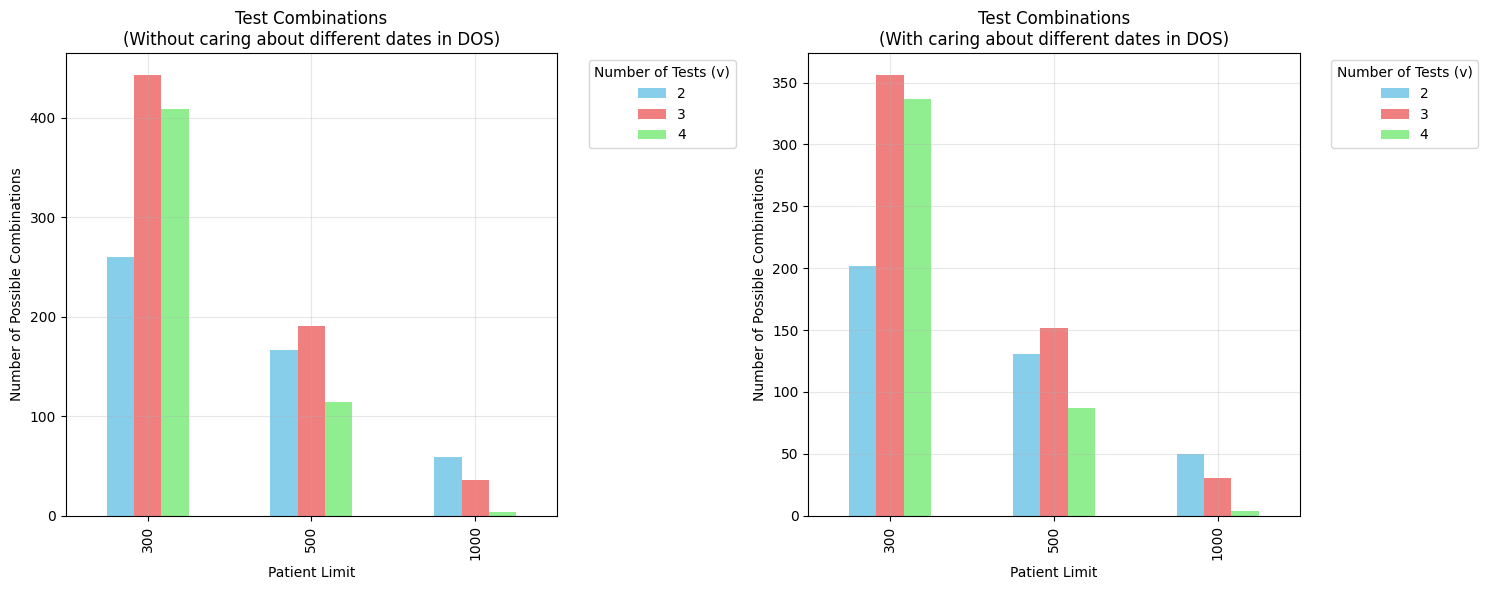

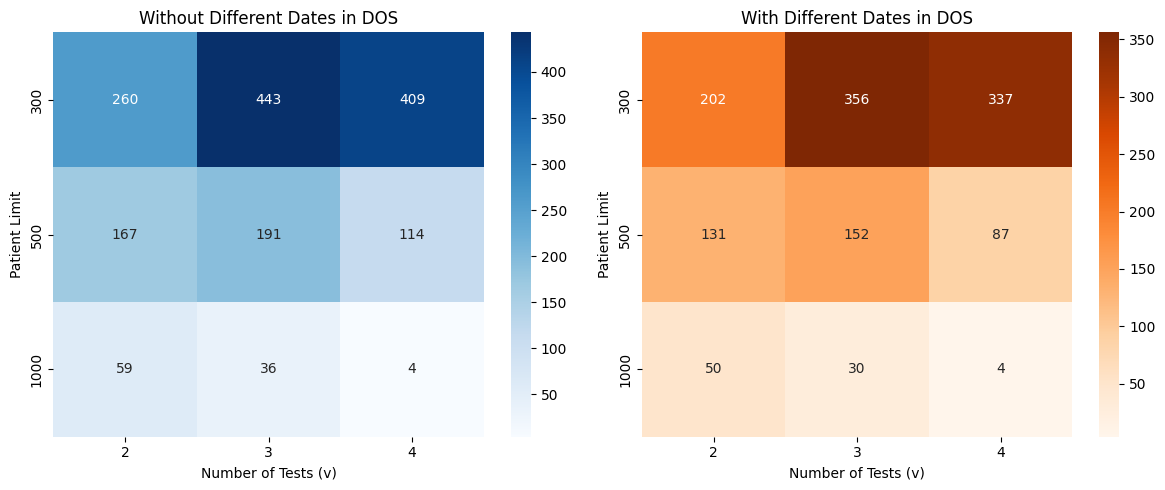

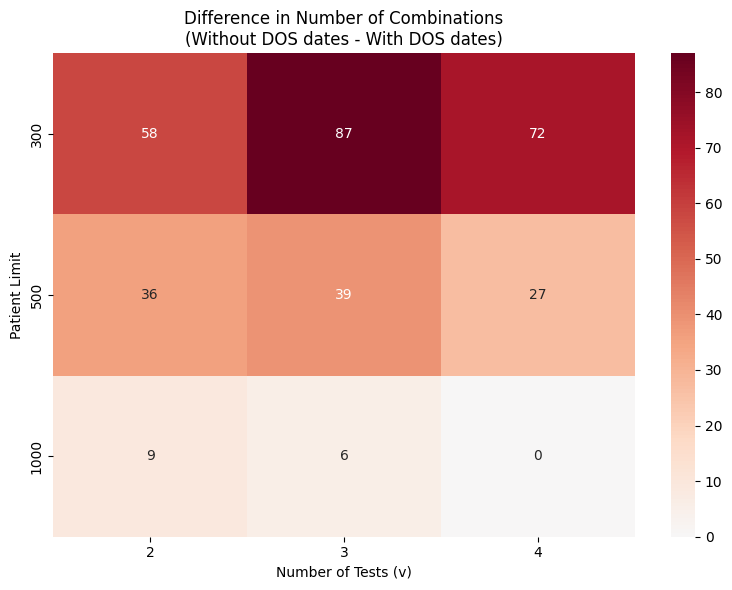

In [125]:
print("THE TOTAL NUMBER OF TEST COMBINATIONS IN EACH CRITERIA\n1. Without caring about different dates in DOS\n2. With caring about different dates in DOS")

# Create visualizations for the pivot tables
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for pivot_table (without caring about different dates)
pivot_table.plot(kind='bar', ax=axes[0], color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0].set_title('Test Combinations\n(Without caring about different dates in DOS)')
axes[0].set_xlabel('Patient Limit')
axes[0].set_ylabel('Number of Possible Combinations')
axes[0].legend(title='Number of Tests (v)', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True, alpha=0.3)

# Plot for pivot_table_2 (with caring about different dates)
pivot_table_2.plot(kind='bar', ax=axes[1], color=['skyblue', 'lightcoral', 'lightgreen'])
axes[1].set_title('Test Combinations\n(With caring about different dates in DOS)')
axes[1].set_xlabel('Patient Limit')
axes[1].set_ylabel('Number of Possible Combinations')
axes[1].legend(title='Number of Tests (v)', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create a comparison heatmap
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap for pivot_table
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Without Different Dates in DOS')
axes[0].set_xlabel('Number of Tests (v)')
axes[0].set_ylabel('Patient Limit')

# Heatmap for pivot_table_2
sns.heatmap(pivot_table_2, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('With Different Dates in DOS')
axes[1].set_xlabel('Number of Tests (v)')
axes[1].set_ylabel('Patient Limit')

plt.tight_layout()
plt.show()

# Create difference visualization
difference_table = pivot_table - pivot_table_2
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(difference_table, annot=True, fmt='d', cmap='RdBu_r', center=0, ax=ax)
ax.set_title('Difference in Number of Combinations\n(Without DOS dates - With DOS dates)')
ax.set_xlabel('Number of Tests (v)')
ax.set_ylabel('Patient Limit')
plt.tight_layout()
plt.show()


In [144]:
# for degree of 5:
# limit of 300

subsets = list(combinations(unique_tests_cleaned, 5))
print(f"Total number of subsets of size 5: {len(subsets)}")
for subset in subsets:
    # Create a boolean mask for patients who have all tests in the subset
    mask = df_grouped_by_patient[subset[0]] > 0
    for test in subset[1:]:
        mask = mask & (df_grouped_by_patient[test] > 0)
    
    count = mask.sum()
    if count > 300:
        print(f"Subset {subset} has more than 300 patients. with {count} patients.")


Total number of subsets of size 5: 324632
Subset ('CRP Titer', 'Blood Sugar', 'S.ALP', 'S.GOT ( AST )', 'S.GPT ( ALT )') has more than 300 patients. with 318 patients.
Subset ('CRP Titer', 'Blood Sugar', 'TSH', 'S.Creatinine', 'T.S.B ( Total Serum Bilirubin )') has more than 300 patients. with 579 patients.
Subset ('CRP Titer', 'Blood Sugar', 'S.GOT ( AST )', 'S.Creatinine', 'S.GPT ( ALT )') has more than 300 patients. with 361 patients.
Subset ('CRP Titer', 'Blood Sugar', 'S.GOT ( AST )', 'S.GPT ( ALT )', 'T.S.B ( Total Serum Bilirubin )') has more than 300 patients. with 320 patients.
Subset ('CRP Titer', 'S.ALP', 'S.GOT ( AST )', 'S.Creatinine', 'S.GPT ( ALT )') has more than 300 patients. with 337 patients.
Subset ('CRP Titer', 'S.ALP', 'S.GOT ( AST )', 'S.Creatinine', 'T.S.B ( Total Serum Bilirubin )') has more than 300 patients. with 301 patients.
Subset ('CRP Titer', 'S.ALP', 'S.GOT ( AST )', 'S.GPT ( ALT )', 'T.S.B ( Total Serum Bilirubin )') has more than 300 patients. with 36

## Summary of Key Findings

This analysis of laboratory test data revealed several important insights about data quality and test combination patterns:

### Data Quality Issues

**Date of Birth (DOB) Inaccuracy**: The DOB field contains systematic formatting errors where days of the week beyond 12 are incorrectly converted to 1, indicating an inconsistent date format (likely month/day/year instead of day/month/year). This contrasts with the Date of Sample (DOS) field, which maintains proper day/month/year formatting.

**Name Matching and Consolidation**: Successfully identified and merged similar patient names using fuzzy matching with 85% similarity threshold and first name constraints, achieving high precision in combining duplicate patient records.

### Test Combination Analysis

The study examined test combinations across different criteria and patient volume thresholds:

#### Without Date Constraints
- **2 tests**: 260 combinations (300+ patients), 167 combinations (500+ patients), 59 combinations (1000+ patients)
- **3 tests**: 443 combinations (300+ patients), 191 combinations (500+ patients), 36 combinations (1000+ patients)  
- **4 tests**: 409 combinations (300+ patients), 114 combinations (500+ patients), 4 combinations (1000+ patients)

#### With Temporal Analysis (Multiple Time Points Required)
##### Temporal Analysis Results:
- The total number of tests done across all patients is: **41901**
- The total number of rows is: **18320**
- The total number of unique patients is: **6146**

After requiring multiple time points for patient testing (DOS constraint):
- **2 tests**: 202 combinations (300+ patients), 131 combinations (500+ patients), 50 combinations (1000+ patients)
- **3 tests**: 356 combinations (300+ patients), 152 combinations (500+ patients), 30 combinations (1000+ patients)
- **4 tests**: 337 combinations (300+ patients), 87 combinations (1000+ patients), 4 combinations (1000+ patients)

### Key Observations

1. **Temporal constraints reduce available combinations** by 15-25% across most categories
2. **Higher patient thresholds dramatically limit viable combinations**, especially for 4+ test combinations
3. **3-test combinations show optimal balance** between complexity and patient volume availability
4. **Data preprocessing significantly improved data quality** through name standardization and date validation

These findings provide a foundation for selecting appropriate test combinations for longitudinal health analysis while ensuring adequate statistical power.